In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

### Simple Octave/MATLAB function

In [2]:
identity_5 = np.identity(5)
print(identity_5)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### Linear Regression with one variable

**In this exercise, we are predicting profits for a food truck**

In [3]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

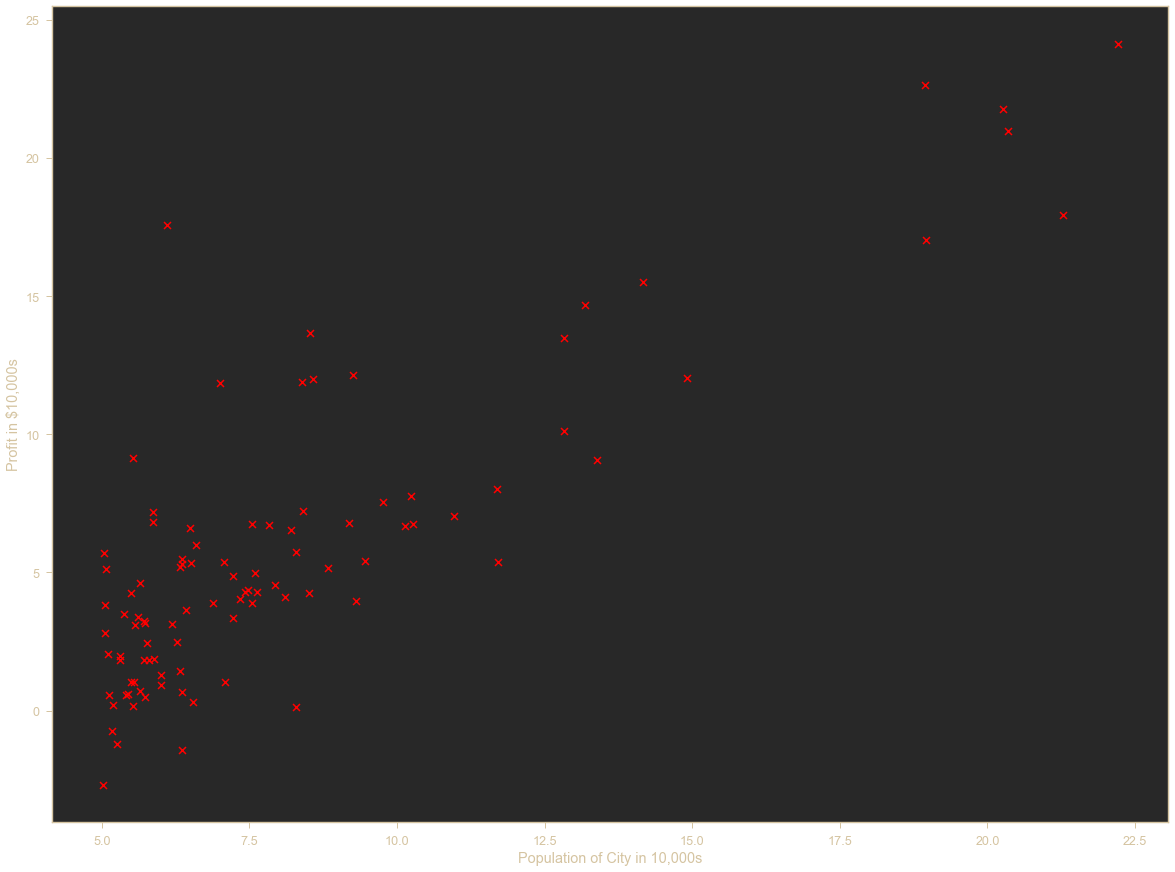

In [4]:
plt.figure(figsize=(20, 15))
plt.scatter(data['Population'], data['Profit'], marker='x', c='Red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

*Goal is to minimize cost function* <br>
J($\theta_0,\theta_1$) = $\frac{1}{2m} \sum\limits_{i=1}^m(h_\theta(x^{i}) - y^{(i)})^{2}$ <br>
*Hypothesis given by*<br>
$h_\theta(x) = \theta^{T}x = \theta_0 + \theta_1x_1$<br>
*Gradient descent to get parameters theta for minimized J($\theta$)*

In [5]:
# m is the number of training data
m = data.shape[0]

In [6]:
X_mat = data['Population'].to_numpy().reshape(m, 1)
X_mat = np.hstack((np.ones((m, 1)), X_mat))
Y_mat = data['Profit'].to_numpy().reshape(m, 1)

In [7]:
# Initializing parameters
theta = np.zeros((2, 1))
# Some gradient descent settings
iterations = 1500
alpha = 0.01

In [8]:
# Implementing the cost function
def ComputeCost(x, y, theta, m):
    J = 0
    J = 1 / (2*m) * np.sum((x @ theta - y) ** 2)
    return J

In [9]:
# Test for different values of theta
theta_test = np.array([-1, 2]).reshape(2, 1)
print(ComputeCost(X_mat, Y_mat, theta, m))
print(ComputeCost(X_mat, Y_mat, theta_test, m))

32.072733877455676
54.24245508201238


In [10]:
theta_test[1][0]

2

In [11]:
X_mat[:, 1].shape

(97,)

In [12]:
# Implementing gradient descent
def GradientDescent(x, y, theta, alpha, m, iterations):
    J = []
    X = x[:, 1].reshape(m, 1)
    for i in range(0, iterations):
        theta_zero = theta[0][0]
        theta_one = theta[1][0]
        theta_zero = theta_zero - alpha * (1/m) * np.sum(x @ theta - y)
        theta_one = theta_one - alpha * \
            (1/m) * np.sum(np.multiply((x @ theta - y), X))
        theta = np.array([theta_zero, theta_one]).reshape(2, 1)
        cost = ComputeCost(x, y, theta, m)
        J.append(cost)
    return theta, J

In [13]:
theta, J = GradientDescent(X_mat, Y_mat, theta, alpha, m, iterations)

**Ensure gradient descent is working correctly**

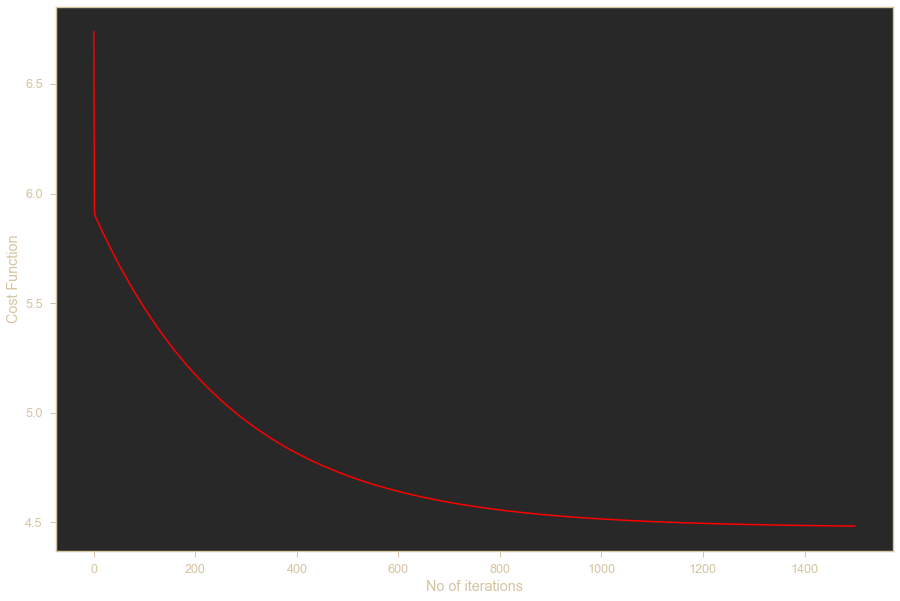

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(J, c='Red')
plt.ylabel('Cost Function')
plt.xlabel('No of iterations')
plt.show()

**Visualize linear regression**

In [15]:
x = np.asanyarray(data[['Population']])

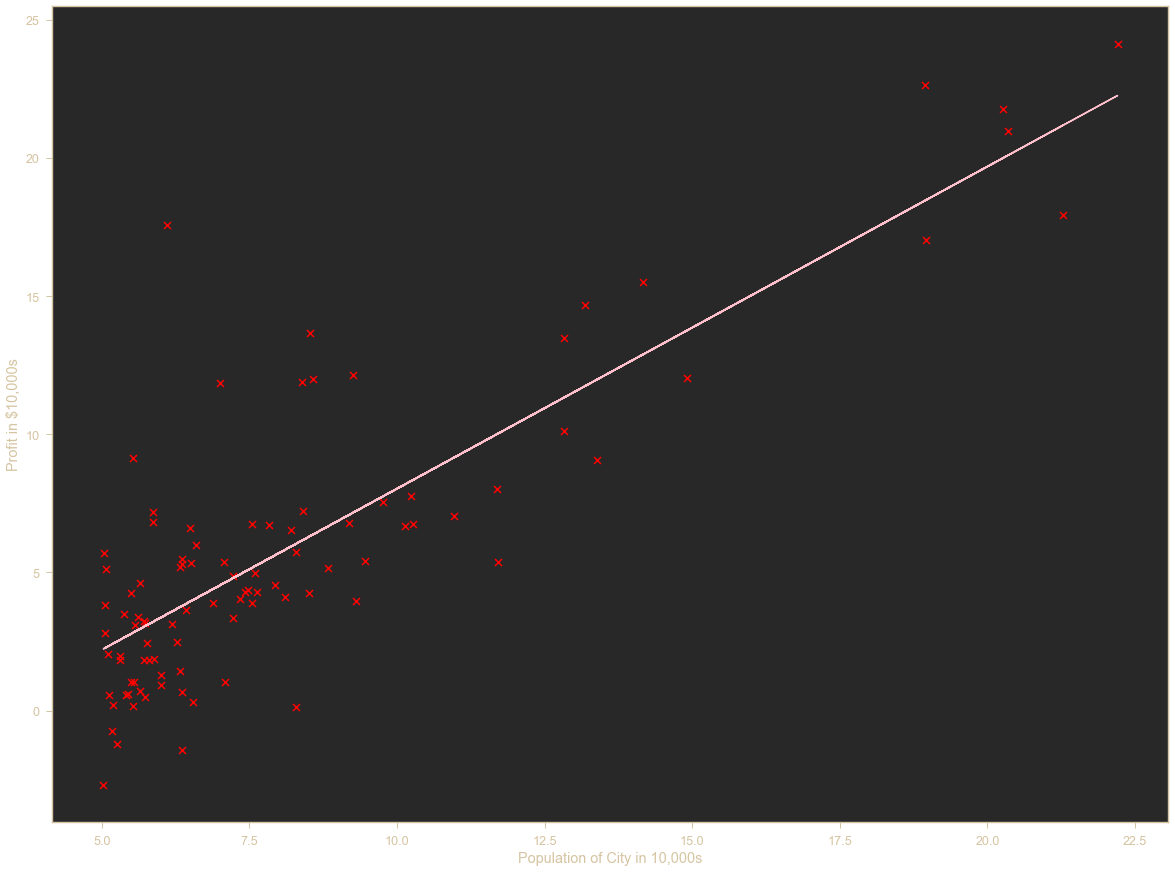

In [16]:
plt.figure(figsize=(20, 15))
plt.scatter(data['Population'], data['Profit'], marker='x', c='Red')
plt.plot(x, theta[0][0] + (x * theta[1][0]), c='Pink')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

*Now we predict profits for population of 35,000 and 70,000*

In [17]:
profit_1 = np.array([1, 3.5]) @ theta * 10000
print('For a population of 35,000, the profit is', profit_1[0])
profit_2 = np.array([1, 7]) @ theta * 10000
print('For a population of 70,000, the profit is', profit_2[0])

For a population of 35,000, the profit is 4519.767867701763
For a population of 70,000, the profit is 45342.450129447134


**Try plotting 3D plot**

In [18]:
theta_zero_vals = np.linspace(-10, 10, 100)
theta_one_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta_zero_vals), len(theta_one_vals)))
for i in range(0, len(theta_zero_vals)):
    for j in range(0, len(theta_one_vals)):
        t = np.array([theta_zero_vals[i], theta_one_vals[j]])
        J_vals[i, j] = ComputeCost(X_mat, Y_mat, t, m)

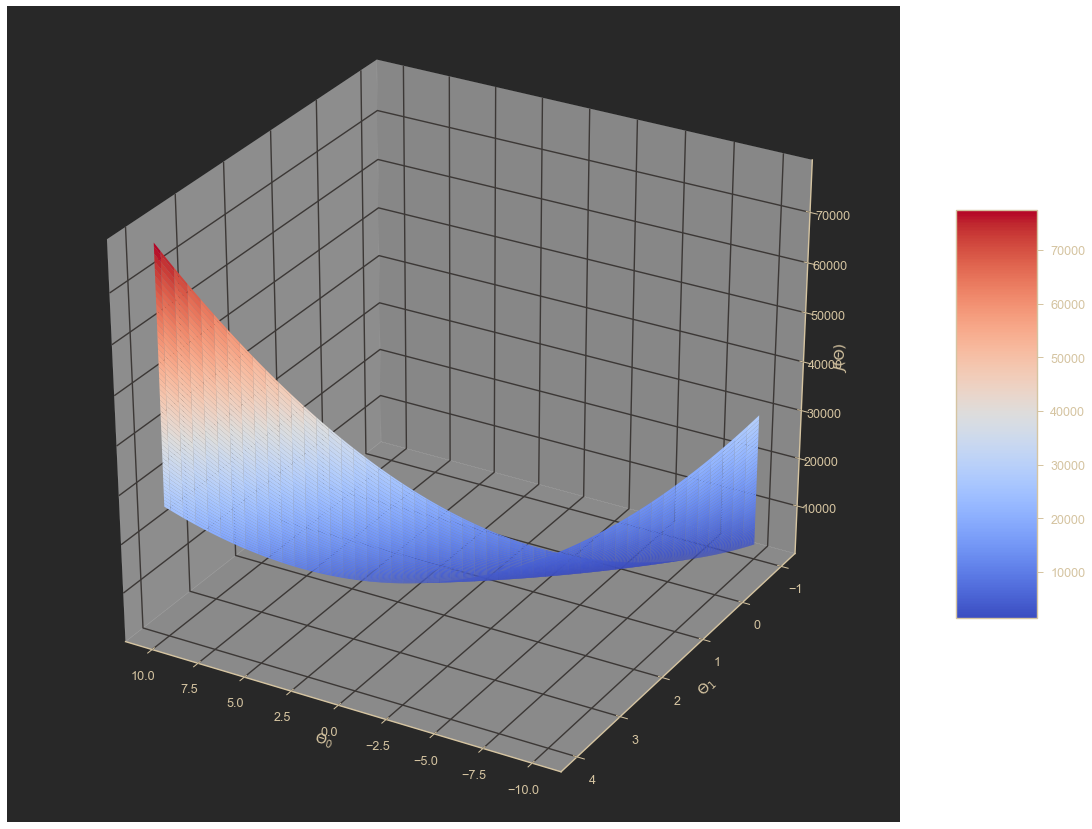

In [19]:
# Generating the surface plot
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta_zero_vals, theta_one_vals,
                       J_vals, cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
# rotate for better angle
ax.view_init(30, 120)

### Use sklearn for linear regression

**First Visualize Data**

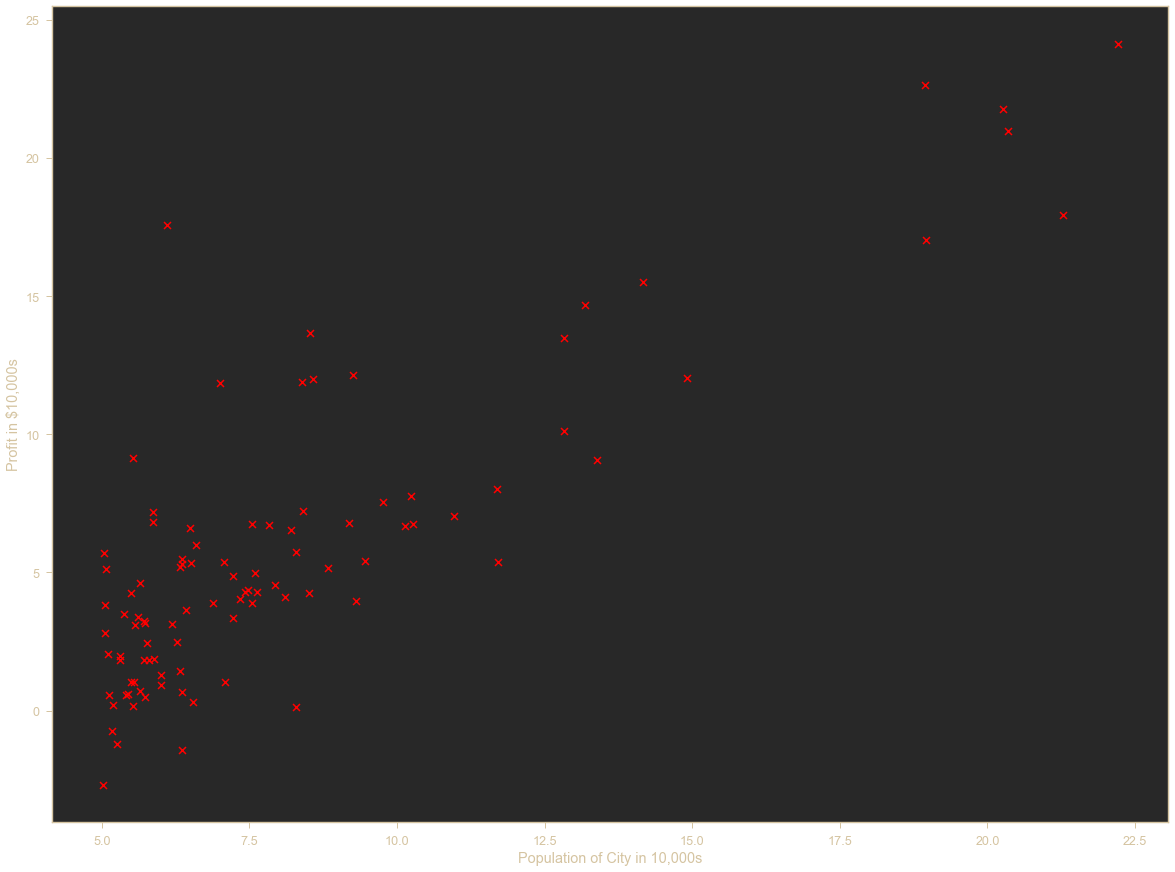

In [20]:
plt.figure(figsize=(20, 15))
plt.scatter(data['Population'], data['Profit'], marker='x', c='Red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [21]:
Population = np.asanyarray(data[['Population']])
Profit = np.asanyarray(data[['Profit']])

In [22]:
regression = linear_model.LinearRegression()
regression.fit(Population,Profit)
print('Intercept value is', regression.intercept_[0])
print('Coefficient value is', regression.coef_[0][0])

Intercept value is -3.8957808783118537
Coefficient value is 1.193033644189594


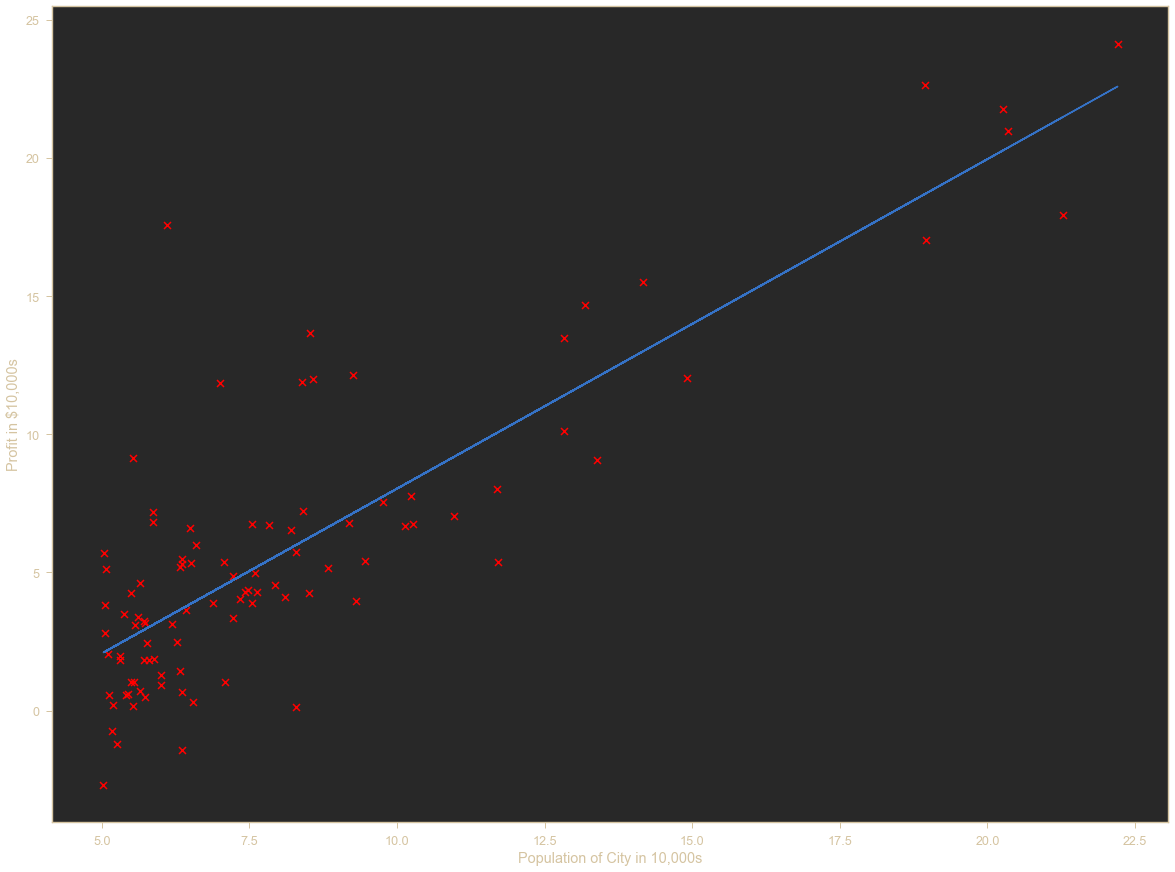

In [23]:
plt.figure(figsize=(20, 15))
plt.scatter(data['Population'], data['Profit'], marker='x', c='Red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(Population, regression.intercept_[0] + regression.coef_[0][0] * Population)
plt.show()